In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Exploring traffic accidents in Barcelona (2017)

## The background

When I lived in Barcelona (for over two years), I was surprised by how well the road systems functioned, despite Barcelona being a relatively large and busy city (population of 1.6m people according to [Wikipedia](https://en.wikipedia.org/wiki/Barcelona)). In this notebook, we'll be looking at the distribution of traffic accidents in the Barcelona Municipality throughout 2017, to see if we can find any patterns that would tell us when is an accident most likely to occur. 

### The data

The dataset come from the **Open Data BCN** projects by the [Barcelona Town Hall](http://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents-gu-bcn). It is incident-level data for every accident that occurred within the municipality of Barcelona in 2017 that was dealt with by the [Guardia Urbana](https://en.wikipedia.org/wiki/Gu%C3%A0rdia_Urbana_de_Barcelona) (the municipal police in Barcelona), so accidents where the police was not called in are not reported. 

The data contains 10339 entries and the following 27 features for every accident, in Catalan:
* `File number`
* `District code`
* `District name`
* `Neighborhood code`
* `Neighbor name`
* `Street code`
* `Street name`
* `Postcode number`
* `Description day week`
* `Week day`
* `Type day description`
* `NK Year`
* `Month of year`
* `Name month` 
* `Day of month`
* `Hour of day`
* `Description turn`
* `Description pedestrian cause`
* `Number of deaths`
* `Number of minor injuries`
* `Number of serious injuries` 
* `Number of victims`
* `Number of vehicles involved`
* `UTM Coordinate (X)` 
* `UTM Coordinate (Y)`
* `Longitude`
* `Latitude`

## Exploring the data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from googletrans import Translator

In [3]:
df = pd.read_csv('2017_accidents_gu_bcn.csv')

In [4]:
df.head(5)

,Número d'expedient,Codi districte,Nom districte,Codi barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia setmana,...,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (X),Coordenada UTM (Y),Longitud,Latitud
0,2017S008429,-1,Desconegut,-1,Desconegut,-1,Número 27 ...,Desconegut,Divendres,Dv,...,Altres,0,2,0,2,2,426936.65,4577079.15,2.125624,41.340045
1,2017S007316,-1,Desconegut,-1,Desconegut,-1,Número 3 Zona Franca / Número 50 Zona Franca ...,Desconegut,Divendres,Dv,...,No és causa del vianant,0,2,0,2,2,426503.22,4577014.83,2.120452,41.339426
2,2017S010210,-1,Desconegut,-1,Desconegut,-1,Litoral (Besòs) ...,K128,Divendres,Dv,...,No és causa del vianant,0,5,0,5,2,430450.5,4579358.49,2.167356,41.360885
3,2017S006364,-1,Desconegut,-1,Desconegut,-1,Número 3 Zona Franca ...,77-111,Divendres,Dv,...,No és causa del vianant,0,1,0,1,2,426842.33,4576816.19,2.124529,41.337668
4,2017S004615,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa ...,0323 0325,Dijous,Dj,...,No és causa del vianant,0,1,0,1,3,"432006,95","4585503,52",2.185272,41.416365


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 27 columns):
Número d'expedient              10339 non-null object
Codi districte                  10339 non-null int64
Nom districte                   10339 non-null object
Codi barri                      10339 non-null int64
Nom barri                       10339 non-null object
Codi carrer                     10339 non-null int64
Nom carrer                      10339 non-null object
Num postal caption              10339 non-null object
Descripció dia setmana          10339 non-null object
Dia setmana                     10339 non-null object
Descripció tipus dia            10339 non-null object
NK Any                          10339 non-null int64
Mes de any                      10339 non-null int64
Nom mes                         10339 non-null object
Dia de mes                      10339 non-null int64
Hora de dia                     10339 non-null int64
Descripció torn                 10

In [6]:
#Optional code if we want to translate the whole doc into English. Doesn't run on my machine as it's too slow =D

In [7]:


#trans_cols = ['Num postal caption','Descripció dia setmana', 
#              'Dia setmana', 'Descripció tipus dia', 'Nom mes', 
#              'Descripció torn', 'Descripció causa vianant']

#for column in trans_cols:
#    for index, item in df[column].iteritems():
#        translator = Translator()
#        df[column][index] = translator.translate(item, src='ca', dest = 'en').text

Looks like unknown is coded in as  `Desconegut` (= unknown), as we'll want to replace that with np.nan so we can visualize what data we're missing. We also see that -1 is used to mean "Unknown", so we'll replace that with NaN as well. 

In [8]:
df.replace(['Desconegut', -1], [np.nan, np.nan], inplace = True)

Let's translate the columns to English so at least that makes some sense.

In [9]:
df.columns = ['File number', 'District code', 'District name', 'Neighborhood code',
              'Neighborhood name', 'Street code', 'Street name', 'Postcode number',
              'Description week day', 'Week day', 'Type of day description',
              'NK Year', 'Month of year', 'Name month', 'Day of month', 'Hour of day',
              'Description turn', 'Description pedestrian cause', 'Number of deaths',
              'Number of minor injuries', 'Number of serious injuries',
              'Number of victims', 'Number of vehicles involved', 
              'UTM Coordinate (X)', 'UTM Coordinate (Y)', 'Longitude', 'Latitude']

df.columns

Index(['File number', 'District code', 'District name', 'Neighborhood code',
       'Neighborhood name', 'Street code', 'Street name', 'Postcode number',
       'Description week day', 'Week day', 'Type of day description',
       'NK Year', 'Month of year', 'Name month', 'Day of month', 'Hour of day',
       'Description turn', 'Description pedestrian cause', 'Number of deaths',
       'Number of minor injuries', 'Number of serious injuries',
       'Number of victims', 'Number of vehicles involved',
       'UTM Coordinate (X)', 'UTM Coordinate (Y)', 'Longitude', 'Latitude'],
      dtype='object')

In [10]:
df['Street name'] = df['Street name'].str.capitalize()

And we can also inspect for Null values and drop them. 

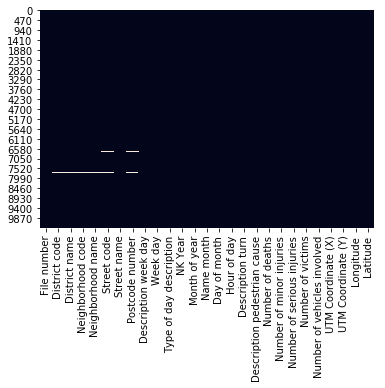

In [11]:
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [12]:
df.dropna(inplace = True)

## Exploratory Data Analysis

Let's see if there's any weird or interesting patterns in our data by simply exploring what we have on hand. 

#### Big picture
How many accidents happen on a daily basis?

In [13]:
df['Date'] = pd.to_datetime({'year': 2017, 'month': df['Month of year'], 'day': df['Day of month']})
print('Average daily traffic incidents in Barcelona:' + '\t'
      + str(round(df['File number'].count()/df['Date'].nunique(), 2)))

Average daily traffic incidents in Barcelona:	28.17


#### Accidents by district

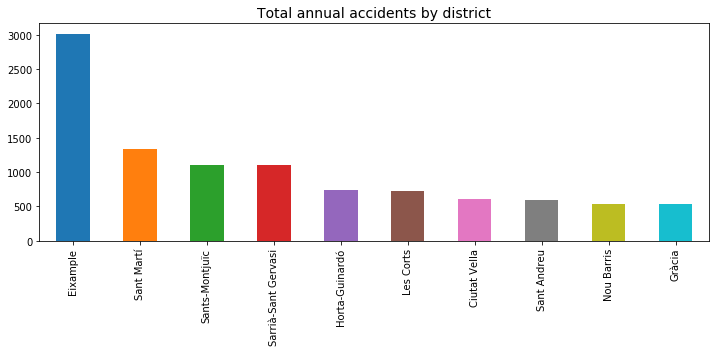

In [14]:
#df['District name'].value_counts()
df['District name'].value_counts().plot(kind = 'bar', figsize = (12, 4))
plt.title('Total annual accidents by district', size = 14)
plt.show()

#### ...and by specific neighborhood

In [15]:
df.groupby(['District name', 'Neighborhood name'], as_index = True, sort = True)['File number'].count()

District name        Neighborhood name                           
Ciutat Vella         Sant Pere, Santa Caterina i la Ribera            134
                     el Barri Gòtic                                   178
                     el Raval                                         150
                     la Barceloneta                                   138
Eixample             Sant Antoni                                      232
                     el Fort Pienc                                    272
                     l'Antiga Esquerra de l'Eixample                  587
                     la Dreta de l'Eixample                          1165
                     la Nova Esquerra de l'Eixample                   384
                     la Sagrada Família                               377
Gràcia               Vallcarca i els Penitents                        150
                     el Camp d'en Grassot i Gràcia Nova               122
                     el Coll                  

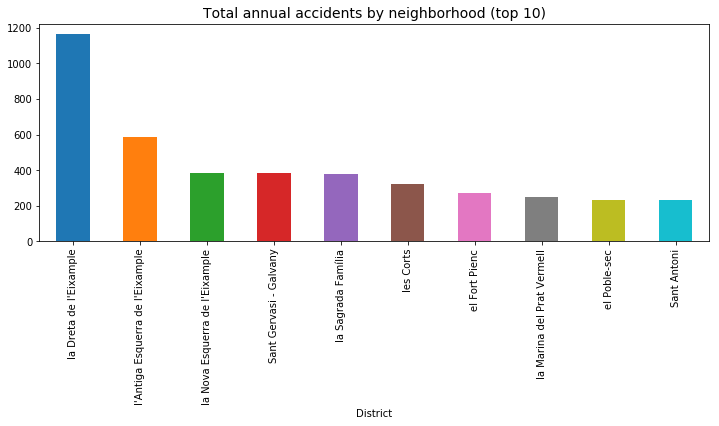

In [16]:
#df['Neighborhood name'].value_counts().head()
df['Neighborhood name'].value_counts().head(10).plot(kind = 'bar', figsize = (12, 4))
plt.title('Total annual accidents by neighborhood (top 10)', size = 14)
plt.xlabel('District')
plt.show()

#This is if we want to see a stacked bar graph of District / Neighborhood

#df.groupby(['District name', 'Neighborhood name']).size().unstack().plot(kind='bar', stacked=True, figsize = (20, 8))
#plt.legend(loc = 1, ncol = 3, bbox_to_anchor= (1, -0.3))
#plt.show()
#df2[['District name', 'Neighborhood name']].plot(kind='bar', stacked=True)

#### Which day and time are the worst for traffic accidents?

We see below how accidents are distributed throught the week (1 = Monday, 7 = Sunday):

In [17]:
#Convert days of the week into integers so we can plot them
df['Day num'] = df['Description week day'].map({'Divendres': 5, 'Dimarts': 2, 'Dijous': 4, 
                                                'Dimecres': 3, 'Dilluns': 1, 'Dissabte': 6, 'Diumenge': 7})
df['Day num'] = df['Day num'].astype(int)

5    1751
2    1684
4    1671
3    1638
1    1501
6    1150
7     888
Name: Day num, dtype: int64


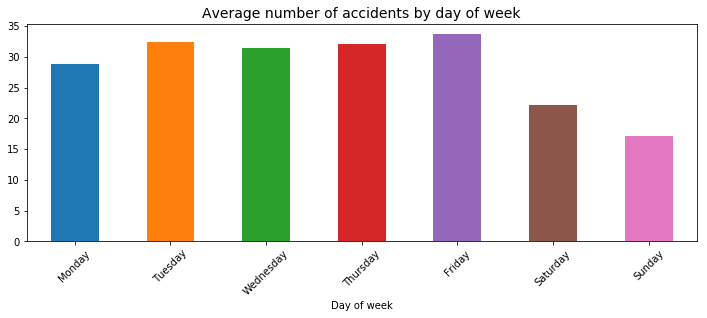

In [18]:
print(df['Day num'].value_counts())
byday = df.groupby('Day num').count()
(byday['File number']/52).plot(kind = 'bar', figsize = (12, 4))
plt.title('Average number of accidents by day of week', size = 14)
plt.xlabel('Day of week')
plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.show()

#### Are some months worse than others?

Seems like November and May top the accident level, while August and September are pretty  safe. 

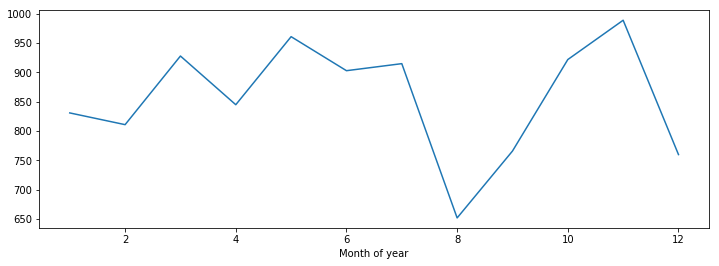

In [19]:
#df['Month of year'].value_counts().sort_index().plot()
df.groupby('Month of year').count()['File number'].plot(figsize = (12,4))

The same can be said if we look at all data for the year (daily) or the monthly averages per day (i.e. on average, how many accidents happen on the 1st of the month?). The fluctuations are explained again and again by the much lower number of accidents on the weekends (big drop).

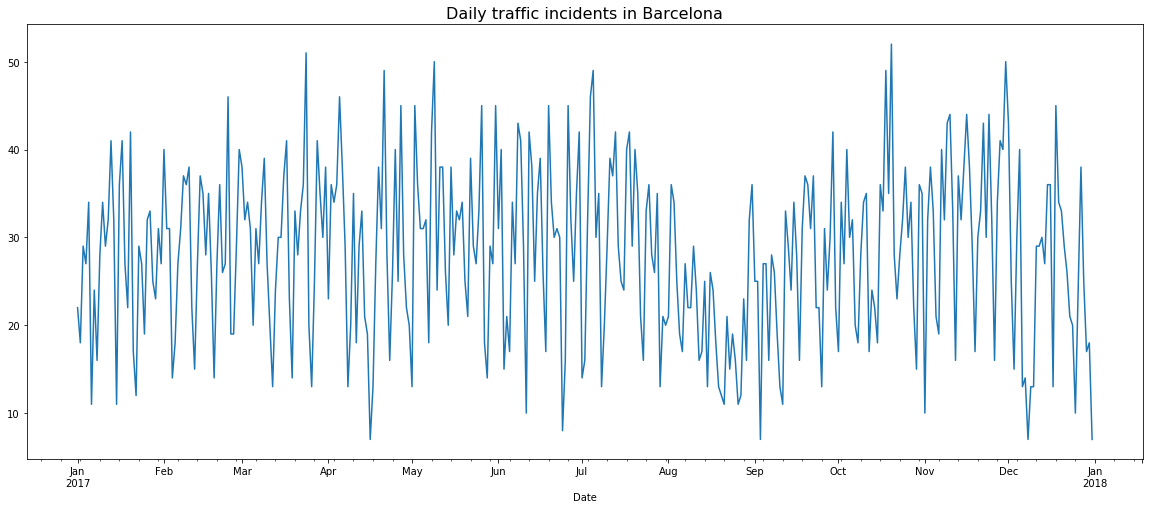

In [20]:
df.groupby('Date').count()['File number'].plot(figsize = (20, 8))
plt.title('Daily traffic incidents in Barcelona', size = 16)
plt.show()

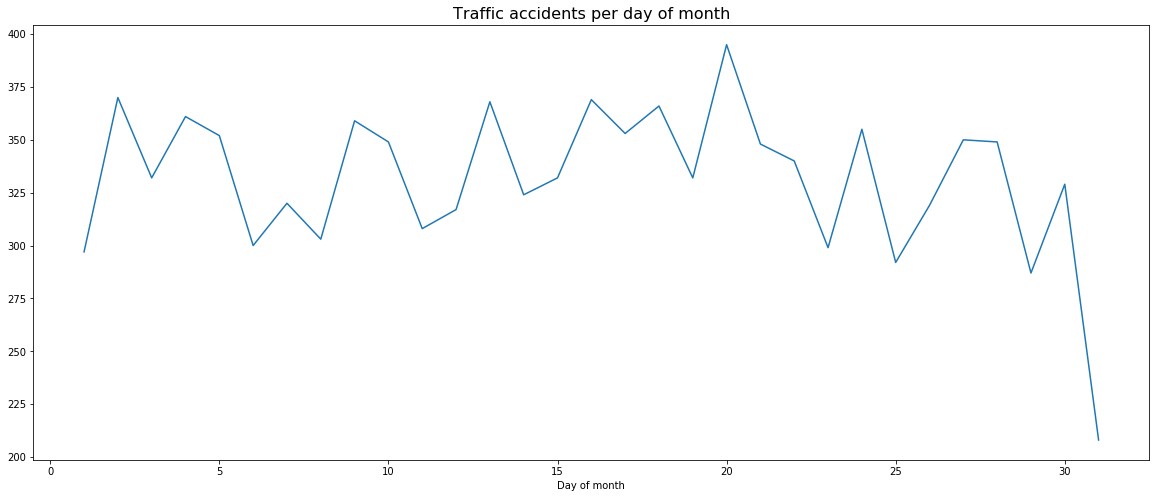

In [21]:
df.groupby('Day of month').count()['File number'].plot(kind = 'line', figsize = (20, 8))
plt.title('Traffic accidents per day of month', size = 16)
plt.show()

### Finally, the time of the day

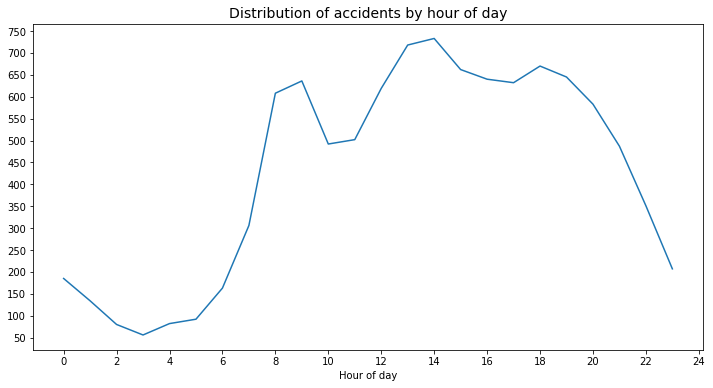

In [22]:
df.groupby('Hour of day')['File number'].count().plot(kind = 'line', figsize = (12, 6))
plt.title('Distribution of accidents by hour of day', size = 14)
plt.locator_params(nbins = 24)
plt.show()

 From the graph above, it looks like we have a spike in accidents around 8-10am, then there is some relatively quier time, and then again a spike between 1-4pm, with a small increase again around 6pm. From there the number of traffic accidents seems to be going down sharply. This is also summarized by the label "Afternoon, Morning, Night" that exists in the dataset as `Description turn` 

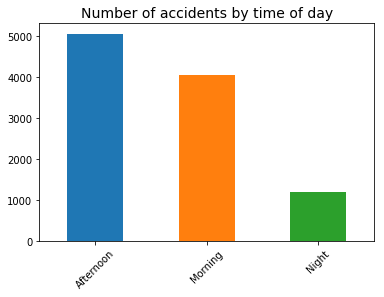

In [23]:
#df['Description turn'].value_counts()
df['Description turn'].value_counts().plot(kind = 'bar')
plt.title('Number of accidents by time of day', size = 14)
plt.xticks(range(0,3), ['Afternoon', 'Morning', 'Night'], rotation = 45)
plt.show()

Interestingly, we see that in the weekends a larger proportion of accidents happens at night than during the morning or afternoon

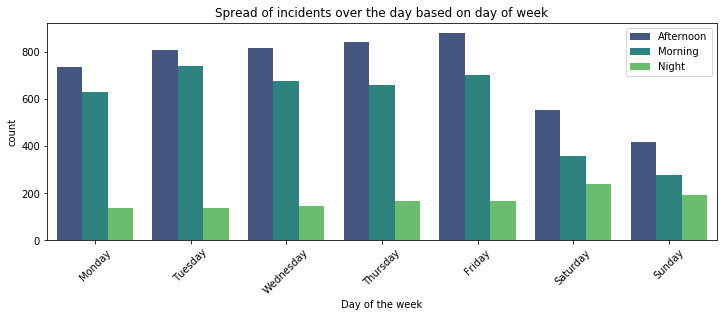

In [24]:
plt.figure(figsize = (12,4))
sns.countplot(df['Day num'], hue = df['Description turn'], palette = 'viridis')
plt.title('Spread of incidents over the day based on day of week')
plt.xlabel('Day of the week')
plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(['Afternoon', 'Morning', 'Night'])
plt.show()

In [25]:
daydict = {1:'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5:'Friday', 6: 'Saturday', 7: 'Sunday'}

df['Day EN'] = df['Day num'].map(daydict)

In [26]:
dayHour = df.groupby(by=['Day EN','Hour of day']).count()['File number'].unstack()

In [27]:
dayHourSagrada = df[df['Neighborhood name'] == 'la Sagrada Família'].groupby(by=['Day EN','Hour of day']).count()['File number'].unstack()

To summarize, we can see below a Heatmap of the accidents per day of the week and hour across BCN. This helps us identify (in the brightest yellow color), which are the times of the week when an accident is most likely to happen). 

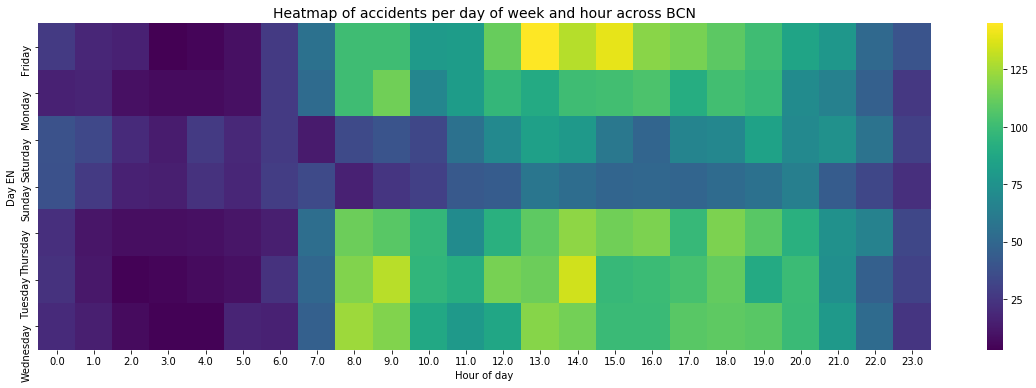

In [28]:
plt.figure(figsize=(20,6))
heatmapBCN = sns.heatmap(dayHour,cmap='viridis')
plt.title('Heatmap of accidents per day of week and hour across BCN', size =14)
#plt.savefig('heatmapBCN.png')
plt.show()

In [29]:
#This is for a specific neighborhood, if we want to see that

#plt.figure(figsize=(20,6))
#sns.heatmap(dayHourSagrada,cmap='viridis')
#plt.title('Heatmap of traffic accidents per day of week and hour in La Sagrada Familia, 2017', size =14)
#plt.savefig('heatmapSagrada.png')
#plt.show()

It looks like Friday between 13:00-15:00 and Tuesday between 14:00 - 15:00 are the peak hours for accidents in Barcelona. 

### Exploring the causes and the consequences

#### What caused the accident? Was it due to a pedestrian?

The answer looks like it's mostly not due to a pedestrian. In the vast majority of the cases below, the accident was not caused by a pedestrian ("no és causa del vianant"). In the few cases where the pedestrian was to blame, we can see the reasons were: 
* Desobeir el senyal del semàfor = Disobeying the traffic light 
* Creuar per fora pas de vianants = Crossing outside the zebra lanes
* Altres = Other reasons
* Transitar a peu per la calçada = Walking on the road
* Desobeir altres senyals = Disobeying other signals

In [30]:
df['Description pedestrian cause'].value_counts()

No és causa del  vianant           9656
Desobeir el senyal del semàfor      247
Creuar per fora pas de vianants     211
Altres                              130
Transitar a peu per la calçada       37
Desobeir altres senyals               2
Name: Description pedestrian cause, dtype: int64

#### Numbers and types of victims

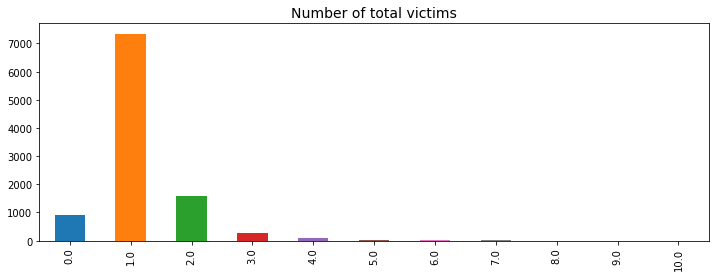

In [31]:
df['Number of victims'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,4))
plt.title('Number of total victims', size = 14)
plt.show()

Looks like in the vast majority of cases there was exactly 1 victim. Let's investigate how serious the injury was. 

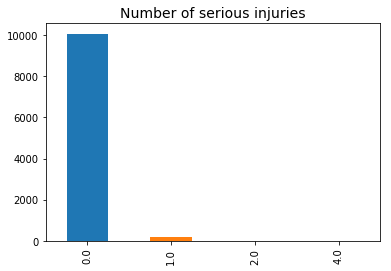

In [32]:
df['Number of serious injuries'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of serious injuries', size = 14)
plt.show()

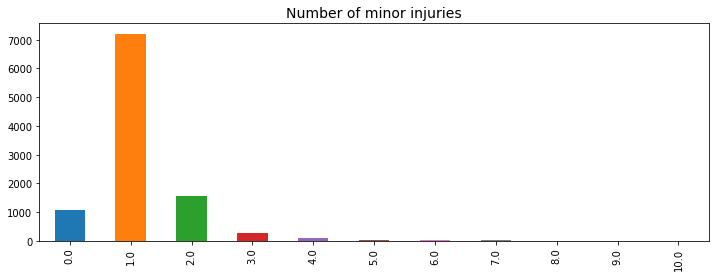

In [33]:
df['Number of minor injuries'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,4))
plt.title('Number of minor injuries', size = 14)
plt.show()

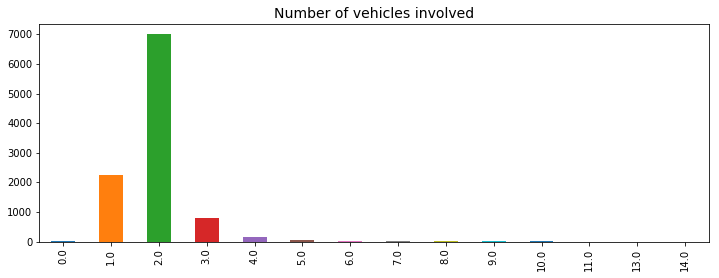

In [34]:
df['Number of vehicles involved'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,4))
plt.title('Number of vehicles involved', size = 14)
plt.show()

So from the above we can see that in the vast majority of cases, two cars were involved, no serious injuries were recorded, but 1 minor injury did occur. 

Now what if we tried to look at the relationship between the different features?

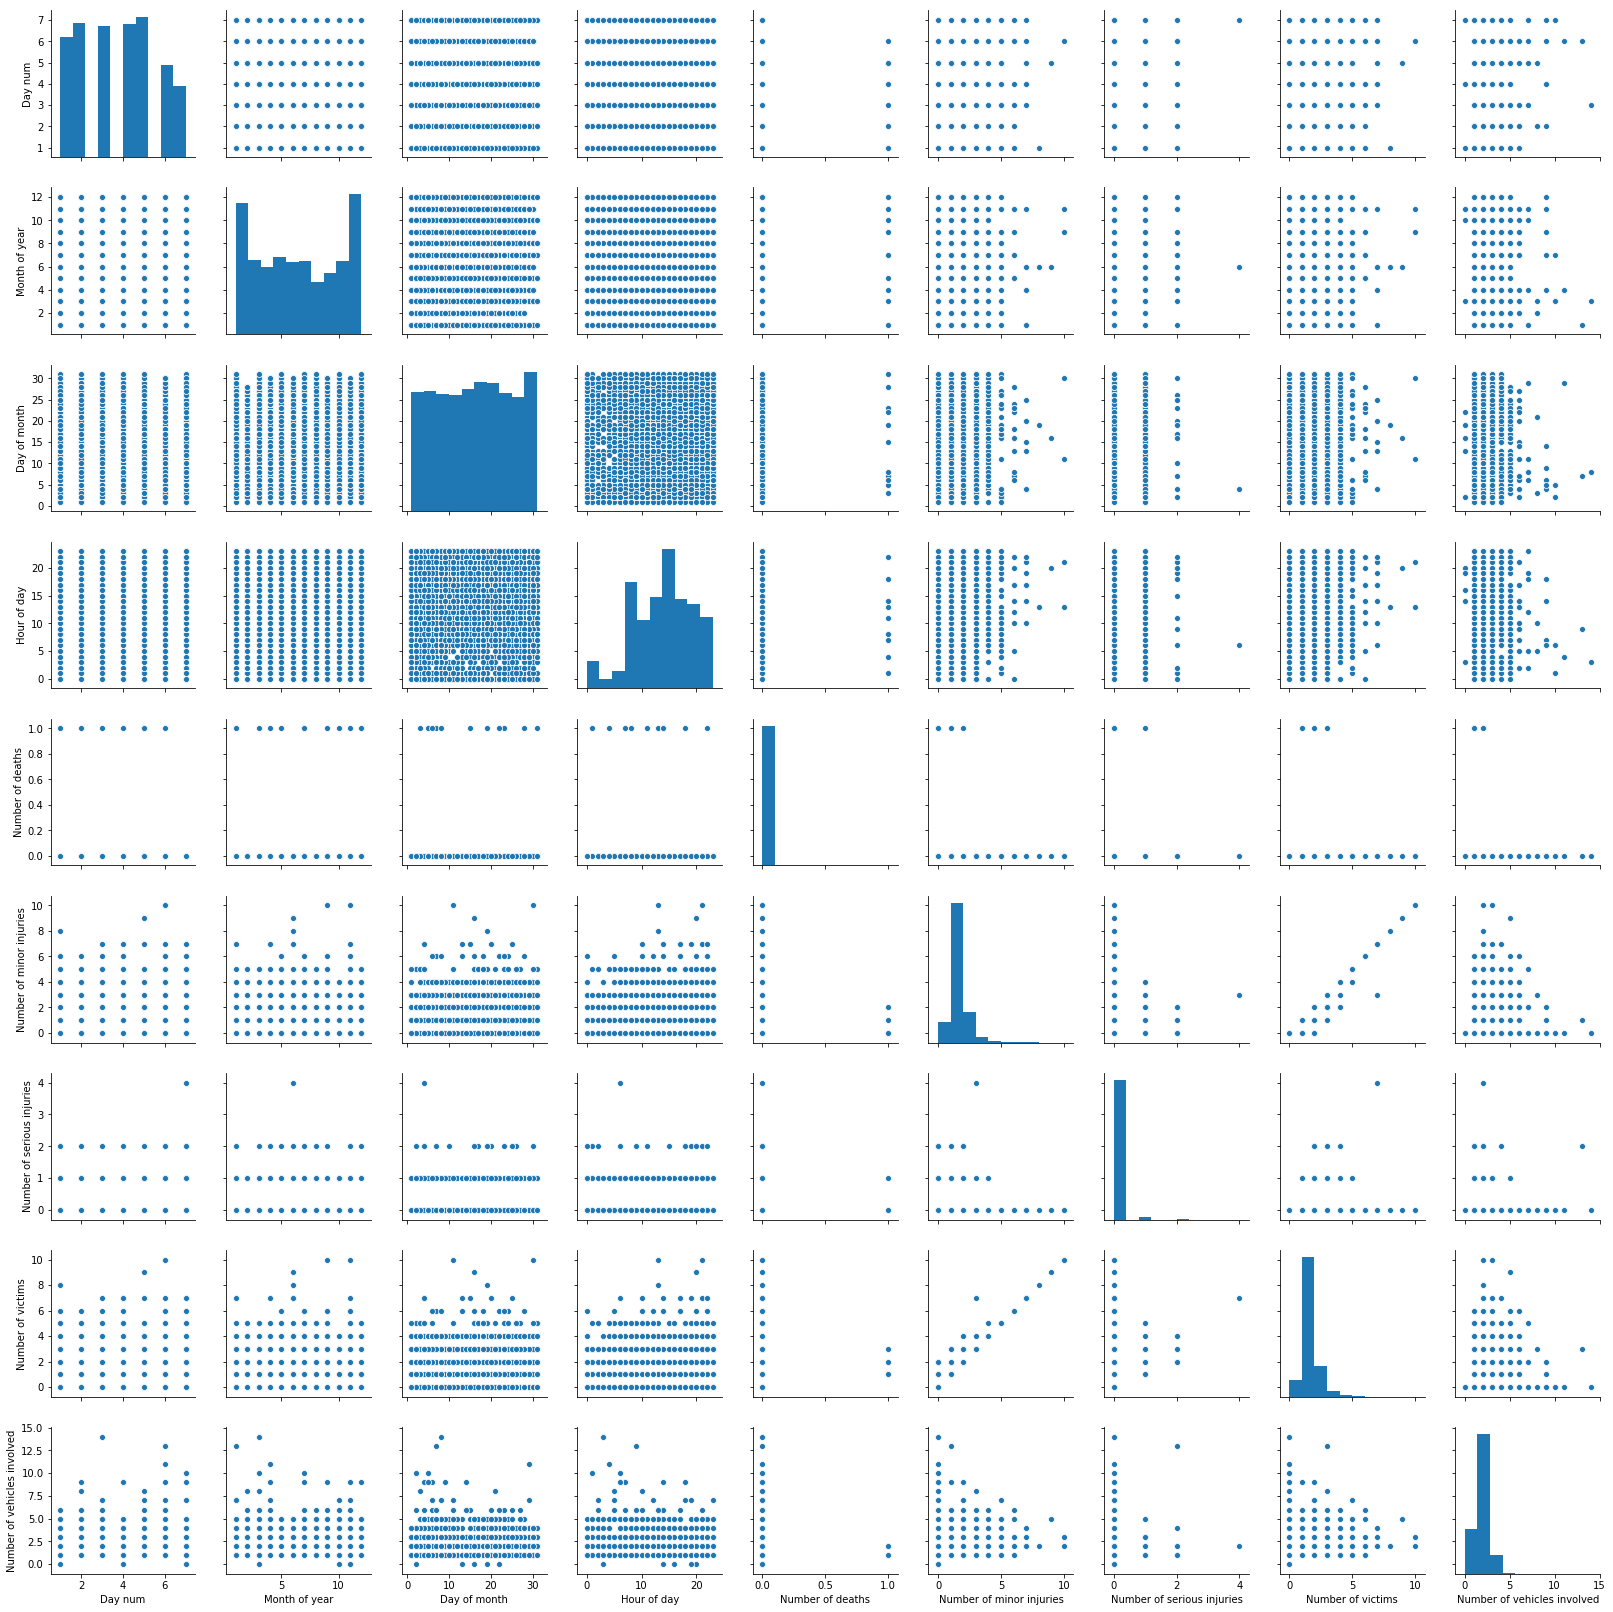

In [35]:
sns.pairplot(df[['Day num','Month of year', 'Day of month', 'Hour of day',
              'Number of deaths', 'Number of minor injuries', 'Number of serious injuries',
              'Number of victims', 'Number of vehicles involved']])
plt.show()

So far we're not really seeing any strong relationships, except for maybe an inverse relationship between all counts of Number of victims and `Number of vehicles involved`. 

### Mapping geolocations

First, let's look at where accidents happen (in terms of specific streets). As you can see, they still represent a small percent of the total. We do notice though some duplicates, which might be hard to clean up (for example "Corts catalanes" is the same as "Gv corts catalanes", or "Diagonal" is the same as "Av diagonal"). Therefore, the name of the street itself won't be of much use here without significant cleanup. 

In [36]:
print("TOP 15 STREETS FOR TRAFFIC ACCIDENTS (% of total)")
df['Street name'].value_counts(normalize = True).head(15)*100

TOP 15 STREETS FOR TRAFFIC ACCIDENTS (% of total)


Corts catalanes                                       2.129729
Diagonal                                              1.711563
Aragó                                                 1.225323
Litoral (llobregat)                                   1.098901
Litoral (besòs)                                       0.953029
Meridiana                                             0.894681
Dalt (llobregat)                                      0.865506
Dalt (besòs)                                          0.855781
València                                              0.719634
Balmes                                                0.700185
Av diagonal                                           0.593212
Gv corts catalanes                                    0.583487
B-20 (besòs)                                          0.525139
Rda dalt (besòs)                                      0.505689
B-10 (besòs)                                          0.486239
Name: Street name, dtype: float64

Fortunately, we have the exact geolocation of the accident in the form of Longitute and Latitude! Visualizing those gives us a much better image of how accidents are distributed across the map of Barcelona. 

In [37]:
import folium
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
from IPython.display import HTML, display
from folium import plugins

In [38]:
df['text'] = 'Accident on ' + df['Street name'] 

In [39]:
#import geopandas

#nybb = os.path.join('data', 'nybb.shp')
#boros = geopandas.GeoDataFrame.from_file(nybb)
#boros['geometry'] = boros['geometry'].simplify(500, preserve_topology=False)

In [40]:
mapo = folium.Map(location = [41.390205, 2.154007], zoom_start = 13, tiles = 'Stamen Toner')
#for index, row in df[0:2000].iterrows():
#    folium.CircleMarker([row['Latitude'], row['Longitude']],
#                        radius=5,
#                        #popup=row['text'],
#                        
#                        fill_color="#3db7e4", # color
#                       ).add_to(mapo)


In [41]:
dfArr = df[['Latitude', 'Longitude']].values.tolist()
mapo.add_child(plugins.HeatMap(dfArr, radius=10))

## Conclusion

From the data we've visually explored above, we can conclude the following: 
1. The vast majority of accidents in Barcelona are not caused by a pedestrian, have 1 minorly injured victim and usually 2 cars are involved. 
2. Deaths are extemely rare (only 12 out of 10283 accidents in all of 2017)
3. Most accidents happen during the workweek, during lunch time (Friday is the peak). We don't have data on the type of cars involved (private vs work cars, vans vs family cars, etc), but one hypothesis could be that the time coincides with many people leaving work to go home for lunch, or that there is a lot of both pedestrian and car activity at the same time, which could cause accidents. 
4. The majority of accidents happen in specific major road junctions, as can be seen in the heatmap above. 